In [6]:
import geopandas as gpd
import maup

voting_data = gpd.read_file("/Users/sherzodnimatullo/Downloads/fl_prim_20_prec/fl_prim_20_cong_prec.shp")
precincts = gpd.read_file("/Users/sherzodnimatullo/code/projects/416/gerrychain/shapefiles/processed/florida/FL_VTDs.shp")

In [ ]:
precincts.to_file("./shapefiles/processed/florida/precinct_level.shp")

In [2]:
print(len(voting_data))
print(len(precincts))

print(voting_data.shape)
print(precincts.shape)

4806
4806
(4806, 98)
(4806, 23)


In [7]:
precincts.columns

Index(['pct_std', 'county', 'precinct', 'G20PRERTRU', 'G20PREDBID',
       'G20PRELJOR', 'G20PREODEL', 'G20PRESLAR', 'G20PREGHAW', 'G20PRECBLA',
       'G20PREOWRI', 'TOT_POP', 'WHITE_POP', 'ASN_POP', 'BLK_POP', 'HSP_POP',
       'DISTRICT', 'geometry'],
      dtype='object')

In [3]:
voting_data.columns

Index(['UNIQUE_ID', 'COUNTYFP', 'pct_std', 'county', 'precinct', 'CONG_DIST',
       'PCON01RGAE', 'PCON01RMER', 'PCON01RMIL', 'PCON03DCHR', 'PCON03DDOD',
       'PCON03DWEL', 'PCON03RCAM', 'PCON03RCHM', 'PCON03RCHS', 'PCON03RENG',
       'PCON03RGEO', 'PCON03RMIL', 'PCON03RROL', 'PCON03RSAP', 'PCON03RTHE',
       'PCON03RWEL', 'PCON04RAGU', 'PCON04RRUT', 'PCON05DCHE', 'PCON05DHOL',
       'PCON05DLAW', 'PCON05RADL', 'PCON05RWAG', 'PCON06DCUR', 'PCON06DTHR',
       'PCON07RGOB', 'PCON07RVAL', 'PCON07RZHA', 'PCON08RCAI', 'PCON08RPOS',
       'PCON09RCAS', 'PCON09ROLS', 'PCON09RORT', 'PCON09RWRI', 'PCON10RFRA',
       'PCON10RMON', 'PCON13RBUC', 'PCON13RGRI', 'PCON13RLUN', 'PCON13RMAK',
       'PCON13RNEW', 'PCON14RELL', 'PCON14RQUI', 'PCON15DCOH', 'PCON15DHAT',
       'PCON15DPHI', 'PCON15RFRA', 'PCON15RSPA', 'PCON18DKEI', 'PCON18DVAZ',
       'PCON18RMAS', 'PCON18RVES', 'PCON19DBAN', 'PCON19DHOL', 'PCON19RAQU',
       'PCON19RASK', 'PCON19RDON', 'PCON19REAG', 'PCON19RFIG', 'PCON19RHEN'

In [64]:
fields = [
        'PCON01RGAE', 'PCON01RMER', 'PCON01RMIL', 'PCON03DCHR', 'PCON03DDOD',
       'PCON03DWEL', 'PCON03RCAM', 'PCON03RCHM', 'PCON03RCHS', 'PCON03RENG',
       'PCON03RGEO', 'PCON03RMIL', 'PCON03RROL', 'PCON03RSAP', 'PCON03RTHE',
       'PCON03RWEL', 'PCON04RAGU', 'PCON04RRUT', 'PCON05DCHE', 'PCON05DHOL',
       'PCON05DLAW', 'PCON05RADL', 'PCON05RWAG', 'PCON06DCUR', 'PCON06DTHR',
       'PCON07RGOB', 'PCON07RVAL', 'PCON07RZHA', 'PCON08RCAI', 'PCON08RPOS',
       'PCON09RCAS', 'PCON09ROLS', 'PCON09RORT', 'PCON09RWRI', 'PCON10RFRA',
       'PCON10RMON', 'PCON13RBUC', 'PCON13RGRI', 'PCON13RLUN', 'PCON13RMAK',
       'PCON13RNEW', 'PCON14RELL', 'PCON14RQUI', 'PCON15DCOH', 'PCON15DHAT',
       'PCON15DPHI', 'PCON15RFRA', 'PCON15RSPA', 'PCON18DKEI', 'PCON18DVAZ',
       'PCON18RMAS', 'PCON18RVES', 'PCON19DBAN', 'PCON19DHOL', 'PCON19RAQU',
       'PCON19RASK', 'PCON19RDON', 'PCON19REAG', 'PCON19RFIG', 'PCON19RHEN',
       'PCON19RKOW', 'PCON19RMCL', 'PCON19RSEV', 'PCON20DCHE', 'PCON20DHAS',
       'PCON20RDEG', 'PCON20RMUS', 'PCON21DFRA', 'PCON21DWEI', 'PCON21RACO',
       'PCON21RFEL', 'PCON21RLOO', 'PCON21RSCA', 'PCON21RSHE', 'PCON21RVIL',
       'PCON22RFLY', 'PCON22RMEL', 'PCON22RPRU', 'PCON22RSWA', 'PCON23DPER',
       'PCON23DSCH', 'PCON23RKRO', 'PCON23RSPA', 'PCON24DFUE', 'PCON24DLEH',
       'PCON24DWIL', 'PCON26RBLA', 'PCON26RGIM', 'PCON27RFIO', 'PCON27RMOL',
       'PCON27RSAL'
]
r = []
d = []
for f in fields:
    if f[6] == 'R':
        r.append(f)
    elif f[6] == 'D':
        d.append(f)

In [82]:
voting_data.to_crs(precincts.crs, inplace=True)
assignment = maup.assign(voting_data, precincts)

/Users/sherzodnimatullo/code/projects/416/gerrychain/env/lib/python3.10/site-packages/maup/indexed_geometries.py:17: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)
/Users/sherzodnimatullo/code/projects/416/gerrychain/env/lib/python3.10/site-packages/maup/indexed_geometries.py:17: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)
/Users/sherzodnimatullo/code/projects/416/gerrychain/env/lib/python3.10/site-packages/maup/intersections.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geometries = geometries[geometries.area > area_cutoff]
/Users/sherzodnimatullo/code/projects/416/gerrychain/env/lib/python3.10/site-packages/maup/assign.py:37: Use

In [83]:
precincts['R_VOTES'] = voting_data[r].groupby(assignment).sum()[r].sum(axis=1)
precincts['D_VOTES'] = voting_data[d].groupby(assignment).sum()[d].sum(axis=1)

<AxesSubplot: >

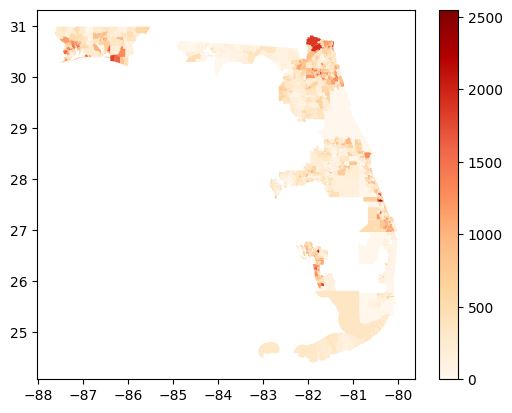

In [84]:
precincts.plot(column="R_VOTES", legend=True, cmap="OrRd")

In [48]:
fields = [
        'PCON01RGAE', 'PCON01RMER', 'PCON01RMIL', 'PCON03DCHR', 'PCON03DDOD',
       'PCON03DWEL', 'PCON03RCAM', 'PCON03RCHM', 'PCON03RCHS', 'PCON03RENG',
       'PCON03RGEO', 'PCON03RMIL', 'PCON03RROL', 'PCON03RSAP', 'PCON03RTHE',
       'PCON03RWEL', 'PCON04RAGU', 'PCON04RRUT', 'PCON05DCHE', 'PCON05DHOL',
       'PCON05DLAW', 'PCON05RADL', 'PCON05RWAG', 'PCON06DCUR', 'PCON06DTHR',
       'PCON07RGOB', 'PCON07RVAL', 'PCON07RZHA', 'PCON08RCAI', 'PCON08RPOS',
       'PCON09RCAS', 'PCON09ROLS', 'PCON09RORT', 'PCON09RWRI', 'PCON10RFRA',
       'PCON10RMON', 'PCON13RBUC', 'PCON13RGRI', 'PCON13RLUN', 'PCON13RMAK',
       'PCON13RNEW', 'PCON14RELL', 'PCON14RQUI', 'PCON15DCOH', 'PCON15DHAT',
       'PCON15DPHI', 'PCON15RFRA', 'PCON15RSPA', 'PCON18DKEI', 'PCON18DVAZ',
       'PCON18RMAS', 'PCON18RVES', 'PCON19DBAN', 'PCON19DHOL', 'PCON19RAQU',
       'PCON19RASK', 'PCON19RDON', 'PCON19REAG', 'PCON19RFIG', 'PCON19RHEN',
       'PCON19RKOW', 'PCON19RMCL', 'PCON19RSEV', 'PCON20DCHE', 'PCON20DHAS',
       'PCON20RDEG', 'PCON20RMUS', 'PCON21DFRA', 'PCON21DWEI', 'PCON21RACO',
       'PCON21RFEL', 'PCON21RLOO', 'PCON21RSCA', 'PCON21RSHE', 'PCON21RVIL',
       'PCON22RFLY', 'PCON22RMEL', 'PCON22RPRU', 'PCON22RSWA', 'PCON23DPER',
       'PCON23DSCH', 'PCON23RKRO', 'PCON23RSPA', 'PCON24DFUE', 'PCON24DLEH',
       'PCON24DWIL', 'PCON26RBLA', 'PCON26RGIM', 'PCON27RFIO', 'PCON27RMOL',
]

r = []
d = []
for f in fields:
    if f[6] == 'R':
        r.append(f)
    elif f[6] == 'D':
        d.append(f)